#Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import  seaborn as sns


#Loading the Dataset

In [ ]:
df = pd.read_csv("cleaned_data.csv")

# Encoding Categorical Data

In [ ]:
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le


In [ ]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


# Splitting the Dataset into Training and Test Set

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#Training the Random Forest on the training set

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=300, random_state=42)

# Making the Confusion Matrix and Computing Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_RF_test = rf.predict(X_test)
y_pred_RF_train = rf.predict(X_train)
cm = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(cm)

test_accuracy = accuracy_score(y_test, y_pred_RF_test)
train_accuracy = accuracy_score(y_train,y_pred_RF_train)
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Accuracy: {train_accuracy:.4f}")


Confusion Matrix:
[[927 109]
 [197 176]]
Accuracy: 0.8070
Accuracy: 0.8507


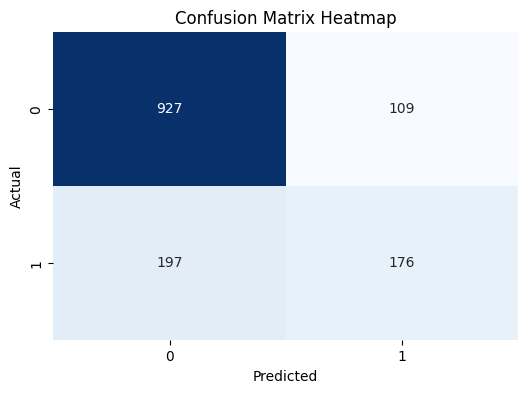

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

<ipython-input-124-0579f8135f51>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_accuracy, test_accuracy], palette='Set2')


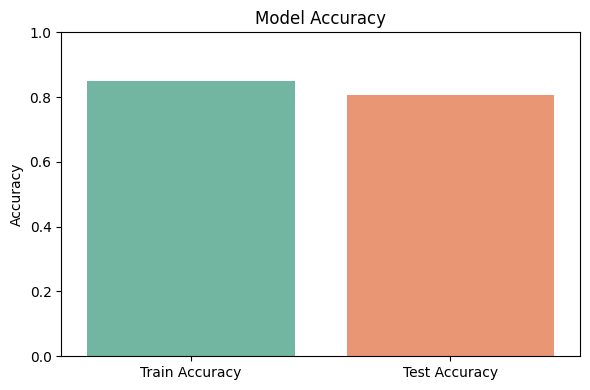

In [ ]:
# Accuracy
train_accuracy = accuracy_score(y_train,y_pred_RF_train)
test_accuracy = accuracy_score(y_test, y_pred_RF_test)



# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_accuracy, test_accuracy], palette='Set2')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

#Feature Importance

<ipython-input-125-7ef4d34b8772>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


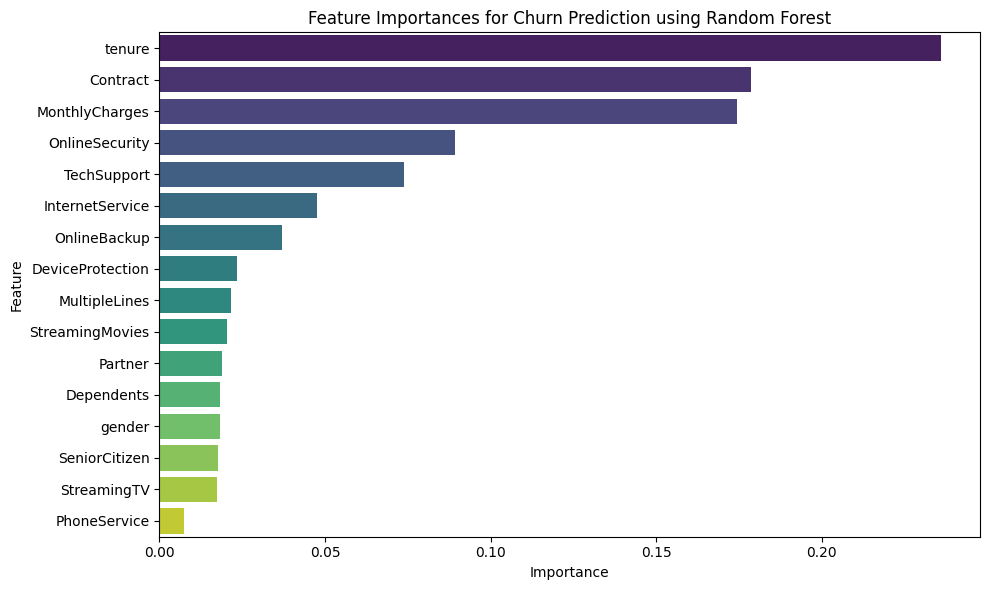

In [ ]:
# Get feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances for Churn Prediction using Random Forest')
plt.tight_layout()
plt.show()
